<a href="https://colab.research.google.com/github/Jectrianama/GCCE_TEST/blob/main/GCECDL1/Iris_gcce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subclassing for GCCE

In [25]:
!git clone https://github.com/Jectrianama/GCCE_TEST.git

fatal: destination path 'GCCE_TEST' already exists and is not an empty directory.


In [26]:
import os
os.chdir('/content/GCCE_TEST/Models')
from  keras_ma_gcce import *
from labels_generation import MA_Clas_Gen
os.chdir('../../')

In [27]:
 
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import mode 
import numpy as np

def ook(t):
  lb = LabelBinarizer()
  y_ook = lb.fit_transform(t)  

  if len(np.unique(t))==2:
    y_ook = np.concatenate((1-y_ook.astype(bool), y_ook), axis = 1) 

  return y_ook

In [28]:
#cargar datos desde drive otros dataset
FILEID = "1AU8pTtCLihBjCZjWITaAzpnEuL4RO436"
#https://drive.google.com/file/d/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  DataGCCE.zip && rm -rf /tmp/cookies.txt
!unzip -o DataGCCE.zip
!dir

--2023-02-11 05:43:49--  https://docs.google.com/uc?export=download&confirm=&id=1AU8pTtCLihBjCZjWITaAzpnEuL4RO436
Resolving docs.google.com (docs.google.com)... 172.253.63.138, 172.253.63.139, 172.253.63.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.63.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k4d1lfqnalbj1tnq1r5ag5jkftjr5elk/1676094225000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=e518bd16-207d-4e0b-847b-7e9001905d3b [following]
--2023-02-11 05:43:49--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k4d1lfqnalbj1tnq1r5ag5jkftjr5elk/1676094225000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=e518bd16-207d-4e0b-847b-7e9001905d3b
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 142.251.167.132, 

In [29]:
#cargar datos desde drive acceso libre
FILEID = "1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW"
#https://drive.google.com/file/d/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MADatasets.zip && rm -rf /tmp/cookies.txt
!unzip -o MADatasets.zip
!dir

--2023-02-11 05:43:50--  https://docs.google.com/uc?export=download&confirm=t&id=1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW
Resolving docs.google.com (docs.google.com)... 172.253.63.138, 172.253.63.139, 172.253.63.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.63.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1qft8hpcg0if72jhbhl7gf54vh56eja3/1676094225000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=ca5accea-8bf1-41e3-baac-7d02889d8f79 [following]
--2023-02-11 05:43:50--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1qft8hpcg0if72jhbhl7gf54vh56eja3/1676094225000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=ca5accea-8bf1-41e3-baac-7d02889d8f79
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 142.251.167.132,

# Load Data

In [30]:
#load data
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf #importar tensorflow
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
database = 'Iris' #['bupa1', 'breast-cancer-wisconsin1','pima-indians-diabetes1', 'ionosphere1', 'tic-tac-toe1', 'iris1', 'wine1', 'segmentation1']


path_ = 'MADatasets/'+ database+ '.mat' 
Xdata = sio.loadmat(path_)
Xdata.keys()


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Y', 'iAnn', 'Exp', 'idxtr', 'idxte'])

In [31]:
X = Xdata['X']
# Xte = Xdata['Xte']
Y = Xdata['Y']
t = Xdata['y'].reshape(-1)
print('X',X.shape,'t',t.shape,'Y',Y.shape)
 

X (150, 4) t (150,) Y (150, 5)


# Labels Generation 

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


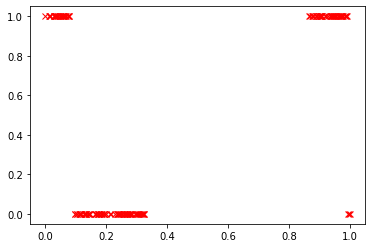

In [32]:
Y, iAnn, Lam_r = MA_Clas_Gen(X ,t, R=5, NrP=1)

In [33]:

Y = Y - 1
t = t - 1


annotator 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

annotator 2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.62      1.00      0.77        50
           2       0.71      1.00      0.83        50

    accuracy                           0.67       150
   macro avg       0.45      0.67      0.53       150
weighted avg       0.45      0.67      0.53       150

annotator 3
              precision    recall  f1-score   support

           0       0.57      0.94      0.71        50
           1       0.52      0.54      0.53        50
           2       0.07      0.02      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


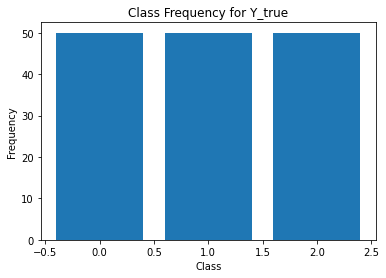

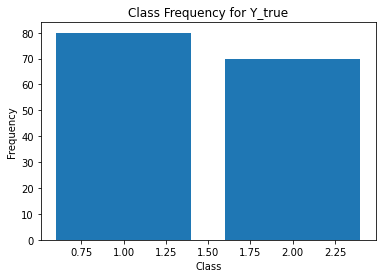

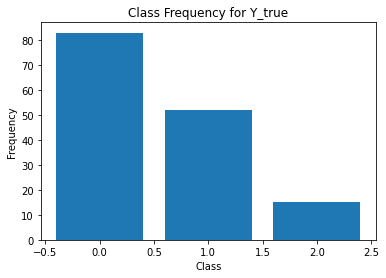

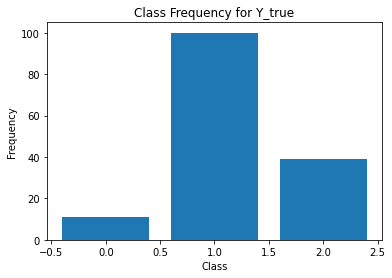

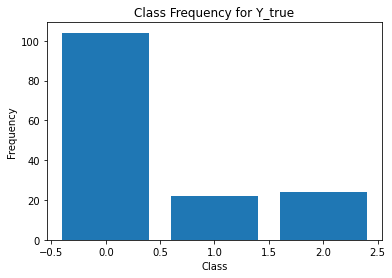

In [34]:
from sklearn.metrics import classification_report
for i in range(Y.shape[1]):
    print('annotator',i+1)
    print(classification_report(t,Y[:,i]))
    unique, counts = np.unique(Y[:,i], return_counts=True)
    plt.figure()
    plt.bar(unique, counts)
#     unique, counts = np.unique(Y_test[5], return_counts=True)
#     plt.bar(unique, counts)

    plt.title('Class Frequency for Y_true')
    plt.xlabel('Class')
    plt.ylabel('Frequency')


# Split data

In [35]:
import numpy.matlib
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
Ns = 1
ss = ShuffleSplit(n_splits=Ns, test_size=0.3,random_state =123)
for train_index, test_index in ss.split(X):
    print(test_index)
    X_train, X_test,Y_train,Y_test = X[train_index,:], X[test_index,:],Y[train_index,:], Y[test_index,:]
    Y_true_train, Y_true_test = t[train_index].reshape(-1,1), t[test_index].reshape(-1,1)
print(X_train.shape, Y_train.shape, Y_true_train.shape)

[ 72 112 132  88  37 138  87  42   8  90 141  33  59 116 135 104  36  13
  63  45  28 133  24 127  46  20  31 121 117   4 130 119  29   0  62  93
 131   5  16  82  60  35 143 145 142]
(105, 4) (105, 5) (105, 1)


# Apply MinMaxScaler

In [36]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Testing the Class 


iteration: 0


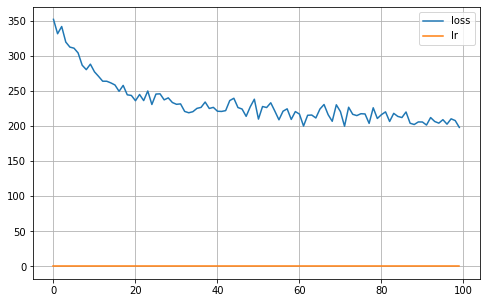

2/2 [==============================] - 0s 5ms/step
Validation ACC: 0.9556
Validation Balanced_ACC: 0.9412
Validation MI: 0.9484
Validation Normalized MI: 0.8807
Validation Adjusted MI: 0.8751
Validation aUc: 1.0000
Validation aUc_Sklearn: 0.9983
iteration: 1


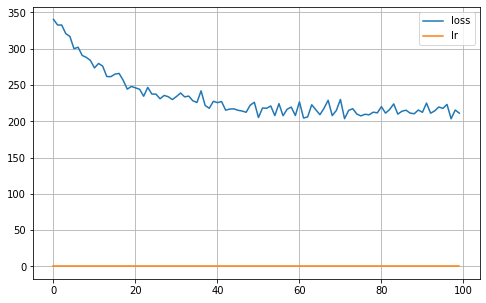

2/2 [==============================] - 0s 7ms/step
Validation ACC: 0.9778
Validation Balanced_ACC: 0.9706
Validation MI: 0.9940
Validation Normalized MI: 0.9260
Validation Adjusted MI: 0.9225
Validation aUc: 1.0000
Validation aUc_Sklearn: 0.9983
iteration: 2


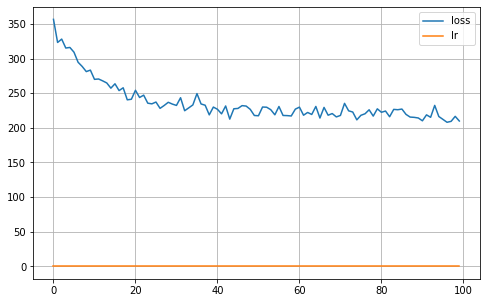

2/2 [==============================] - 0s 6ms/step
Validation ACC: 0.9333
Validation Balanced_ACC: 0.8500
Validation MI: 0.8806
Validation Normalized MI: 0.8448
Validation Adjusted MI: 0.8370
Validation aUc: 1.0000
Validation aUc_Sklearn: 0.9983
iteration: 3


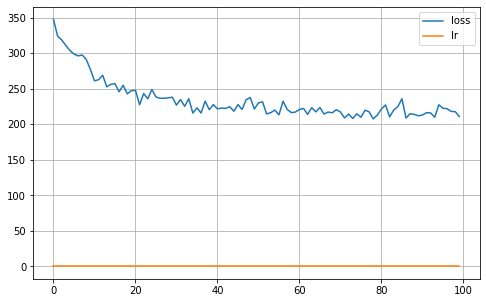

2/2 [==============================] - 0s 5ms/step
Validation ACC: 0.9333
Validation Balanced_ACC: 0.9118
Validation MI: 0.9124
Validation Normalized MI: 0.8460
Validation Adjusted MI: 0.8388
Validation aUc: 1.0000
Validation aUc_Sklearn: 0.9983
iteration: 4


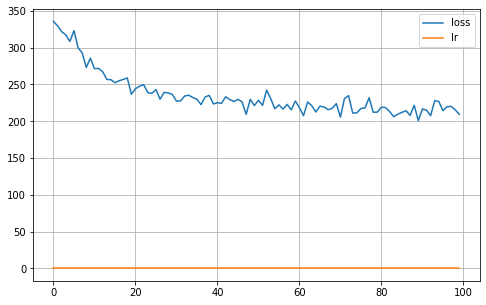

2/2 [==============================] - 0s 7ms/step
Validation ACC: 0.9556
Validation Balanced_ACC: 0.9412
Validation MI: 0.9484
Validation Normalized MI: 0.8807
Validation Adjusted MI: 0.8751
Validation aUc: 1.0000
Validation aUc_Sklearn: 0.9983
iteration: 5


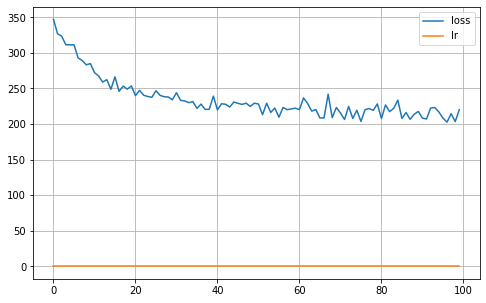

2/2 [==============================] - 0s 6ms/step
Validation ACC: 0.9778
Validation Balanced_ACC: 0.9500
Validation MI: 0.9827
Validation Normalized MI: 0.9256
Validation Adjusted MI: 0.9220
Validation aUc: 1.0000
Validation aUc_Sklearn: 0.9983
iteration: 6


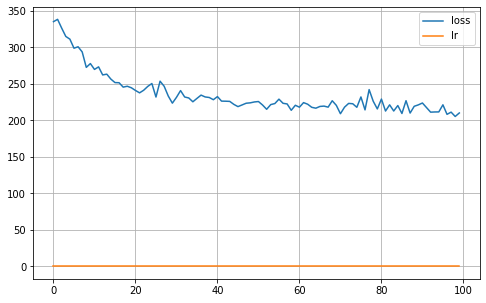

2/2 [==============================] - 0s 5ms/step
Validation ACC: 0.9556
Validation Balanced_ACC: 0.9412
Validation MI: 0.9484
Validation Normalized MI: 0.8807
Validation Adjusted MI: 0.8751
Validation aUc: 1.0000
Validation aUc_Sklearn: 0.9983
iteration: 7


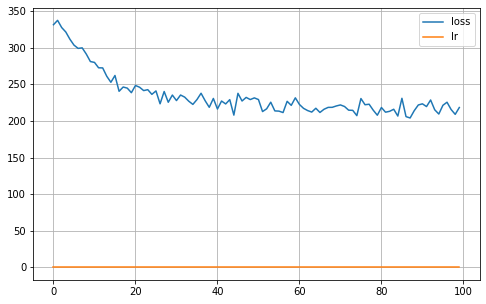

2/2 [==============================] - 0s 3ms/step
Validation ACC: 0.9556
Validation Balanced_ACC: 0.9412
Validation MI: 0.9484
Validation Normalized MI: 0.8807
Validation Adjusted MI: 0.8751
Validation aUc: 1.0000
Validation aUc_Sklearn: 0.9983
iteration: 8


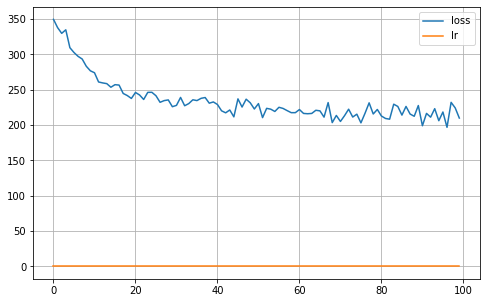

2/2 [==============================] - 0s 5ms/step
Validation ACC: 0.9778
Validation Balanced_ACC: 0.9706
Validation MI: 0.9940
Validation Normalized MI: 0.9260
Validation Adjusted MI: 0.9225
Validation aUc: 1.0000
Validation aUc_Sklearn: 0.9983
iteration: 9


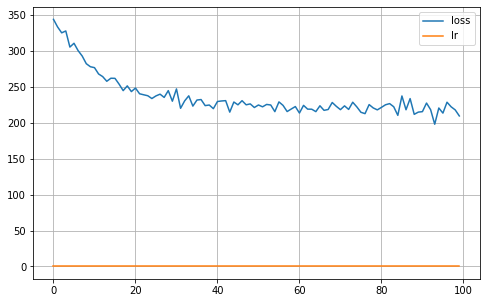

2/2 [==============================] - 0s 8ms/step
Validation ACC: 0.9556
Validation Balanced_ACC: 0.9000
Validation MI: 0.9264
Validation Normalized MI: 0.8797
Validation Adjusted MI: 0.8739
Validation aUc: 1.0000
Validation aUc_Sklearn: 0.9983


In [37]:
from sklearn.metrics import classification_report, balanced_accuracy_score,  roc_auc_score
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score
l1 =0.01
NUM_RUNS =10
ACC = np.zeros(NUM_RUNS)
AUC = np.zeros(NUM_RUNS)
AUCSK = np.zeros(NUM_RUNS)
MI = np.zeros(NUM_RUNS)
NMI = np.zeros(NUM_RUNS)
AMI = np.zeros(NUM_RUNS)
BACC = np.zeros(NUM_RUNS)
for i in range(NUM_RUNS): #10
    print("iteration: " + str(i))
   
    MA = Keras_MA_GCCE(epochs=100,batch_size=64,R=5, K=len(np.unique(Y_true_train)), dropout=0.5, learning_rate=0.01,optimizer='Adam', 
                l1_param=l1,  validation_split=0, verbose=0, q=0.1, neurons=4)


    MA.fit(X_train, Y_train)
    MA.plot_history()
  
    #Accuracy
    pred_2 = MA.predict(X_test)
 
    report = classification_report( pred_2[:,Y.shape[1]:].argmax(axis=1),Y_true_test.ravel(),output_dict=True)
    ACC[i] = report['accuracy']
    print("Validation ACC: %.4f" % (float(ACC[i])))


    # balanced. Accurcy
    BACC[i] = balanced_accuracy_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze(), adjusted=True)
    print("Validation Balanced_ACC: %.4f" % (float(BACC[i])))

    #MI
    
    MI[i] = mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation MI: %.4f" % (float(MI[i]),))
    NMI[i] = normalized_mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation Normalized MI: %.4f" % (float(NMI[i]),))
    AMI[i]= adjusted_mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation Adjusted MI: %.4f" % (float(AMI[i]),))


    #AUC
    val_AUC_metric = tf.keras.metrics.AUC( from_logits = True)  
   # val_logits =MA.predict(X_test) # model(X_test, training=False)
    # tf.print(y_batch_val)
    val_AUC_metric.update_state(Y_true_test, pred_2[:,Y.shape[1]:].argmax(axis=1).astype('float'))

    val_AUC = val_AUC_metric.result()
    val_AUC_metric.reset_states()
    val_AUC = val_AUC.numpy()
    print("Validation aUc: %.4f" % (float(val_AUC),))
    AUC[i] = val_AUC
    val_AUC1 = roc_auc_score(ook(Y_true_test), pred_2[:,Y_train.shape[1]:])
    print("Validation aUc_Sklearn: %.4f" % (float(val_AUC1),))
    AUCSK[i] = val_AUC1


In [38]:

ACC

array([0.95555556, 0.97777778, 0.93333333, 0.93333333, 0.95555556,
       0.97777778, 0.95555556, 0.95555556, 0.97777778, 0.95555556])

In [39]:

AUC

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [40]:
print('Average Accuracy: ', np.round( ACC.mean(),4)*100) 
print('Average std: ',np.round(np.std( ACC),4)*100)

Average Accuracy:  95.78
Average std:  1.5599999999999998


In [41]:
print('Average Accuracy: ', np.round( ACC.mean(),4)*100) 
print('Average std: ',np.round(np.std( ACC),4)*100)

Average Accuracy:  95.78
Average std:  1.5599999999999998


In [42]:
print('Average Balanced Accuracy: ', np.round( BACC.mean(),4)*100) 
print('Average std: ',np.round(np.std( BACC),4)*100)

Average Balanced Accuracy:  93.17999999999999
Average std:  3.4299999999999997


In [43]:
print('Average AUC: ', np.round( AUC.mean(),4)*100) 
print('Average AUC std: ',np.round(np.std( AUC),4)*100)

Average AUC:  100.0
Average AUC std:  0.0


In [44]:
print('Average MI: ', np.round( MI.mean(),4)*100) 
print('Average std: ',np.round(np.std(MI),4)*100)

Average MI:  94.84
Average std:  3.42


In [45]:
print('Average Normalized MI: ', np.round( NMI.mean(),4)*100) 
print('Average std: ',np.round(np.std(NMI),4)*100)

Average Normalized MI:  88.71
Average std:  2.86


In [46]:
print('Average Ajdusted MI: ', np.round( AMI.mean(),4)*100) 
print('Average std: ',np.round(np.std(AMI),4)*100)

Average Ajdusted MI:  88.17
Average std:  3.0


In [47]:
print('Average Accuracy: ', np.round( ACC.mean(),4)*100) 
print('Average std: ',np.round(np.std( ACC),4)*100)
print('==============================================')
print('Average AUC: ', np.round( AUC.mean(),4)*100) 
print('Average AUC std: ',np.round(np.std( AUC),4)*100)
print('==============================================')
print('Average AUC Sklearn: ', np.round( AUCSK.mean(),4)*100) 
print('Average AUC SK std: ',np.round(np.std( AUCSK),4)*100)
print('==============================================')
print('Average Balanced Accuracy: ', np.round( BACC.mean(),4)*100) 
print('Average std: ',np.round(np.std( BACC),4)*100)
print('==============================================')
print('Average MI: ', np.round( MI.mean(),4)*100) 
print('Average std: ',np.round(np.std(MI),4)*100)
print('==============================================')
print('Average Normalized MI: ', np.round( NMI.mean(),4)*100) 
print('Average std: ',np.round(np.std(NMI),4)*100)
print('==============================================')
print('Average Ajdusted MI: ', np.round( AMI.mean(),4)*100) 
print('Average std: ',np.round(np.std(AMI),4)*100)

Average Accuracy:  95.78
Average std:  1.5599999999999998
Average AUC:  100.0
Average AUC std:  0.0
Average AUC Sklearn:  99.83
Average AUC SK std:  0.0
Average Balanced Accuracy:  93.17999999999999
Average std:  3.4299999999999997
Average MI:  94.84
Average std:  3.42
Average Normalized MI:  88.71
Average std:  2.86
Average Ajdusted MI:  88.17
Average std:  3.0


In [50]:
import pickle

# create the dictionary with 6 scalar variables
Metrics = {
    'Accuracy': np.round( ACC.mean(),4)*100,
    'Accuracy_std': np.round(np.std( ACC),4)*100,
    'AUC': np.round( AUC.mean(),4)*100,
    'AUC_std': np.round(np.std( AUC),4)*100,
    'AUCSK': np.round( AUCSK.mean(),4)*100,
    'AUCSK_std': np.round(np.std( AUCSK),4)*100,
    'Balanced Accuracy': np.round( BACC.mean(),4)*100,
    'Balanced Accuracy_std':  np.round(np.std(BACC),4)*100,
    'MI': np.round( MI.mean(),4)*100,
    'MI_std': np.round(np.std(MI),4)*100,
    'Normalized MI': np.round( NMI.mean(),4)*100,
    'Normalized MI_std': np.round(np.std(NMI),4)*100,
    'Adjusted MI': np.round( AMI.mean(),4)*100,
    'Adjusted MI_std': np.round(np.std(NMI),4)*100,
}

# save the dictionary to a file using pickle
with open('data.pickle', 'wb') as handle:
    pickle.dump(Metrics, handle, protocol=pickle.HIGHEST_PROTOCOL)
Metrics

{'Accuracy': 95.78,
 'Accuracy_std': 1.5599999999999998,
 'AUC': 100.0,
 'AUC_std': 0.0,
 'AUCSK': 99.83,
 'AUCSK_std': 0.0,
 'Balanced Accuracy': 93.17999999999999,
 'Balanced Accuracy_std': 3.4299999999999997,
 'MI': 94.84,
 'MI_std': 3.42,
 'Normalized MI': 88.71,
 'Normalized MI_std': 2.86,
 'Adjusted MI': 88.17,
 'Adjusted MI_std': 2.86}